In [280]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

In [183]:
df_penetracion=pd.read_excel('Data\Internet.xlsx', sheet_name='Penetracion-hogares')

In [184]:
df_penetracion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2023,4,Buenos Aires,80.96
1,2023,4,Capital Federal,117.02
2,2023,4,Catamarca,68.63
3,2023,4,Chaco,44.35
4,2023,4,Chubut,84.96


In [185]:
df_penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           960 non-null    int64  
 1   Trimestre                     960 non-null    int64  
 2   Provincia                     960 non-null    object 
 3   Accesos por cada 100 hogares  960 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.1+ KB


In [186]:
print("Porcentaje de valores nulos:\n", df_penetracion.isna().sum())
print("\nCantidad de filas duplicadas:\n", df_penetracion.duplicated().sum())

Porcentaje de valores nulos:
 Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

Cantidad de filas duplicadas:
 0


In [187]:
df_penetracion = df_penetracion.map(lambda x: x.lower() if isinstance(x, str) else x)
faltantes = ['', ' ', '.', '...', 'sd', 'sd-sd', 'point (. .)']
df_penetracion.replace(faltantes, np.nan, inplace=True)
df_penetracion.infer_objects(copy=False)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2023,4,buenos aires,80.960000
1,2023,4,capital federal,117.020000
2,2023,4,catamarca,68.630000
3,2023,4,chaco,44.350000
4,2023,4,chubut,84.960000
...,...,...,...,...
955,2014,1,santa cruz,28.939093
956,2014,1,santa fe,47.847663
957,2014,1,santiago del estero,16.309924
958,2014,1,tierra del fuego,63.965926


In [188]:
print("Porcentaje de valores nulos:\n", df_penetracion.isna().sum())
print("\nCantidad de filas duplicadas:\n", df_penetracion.duplicated().sum())

Porcentaje de valores nulos:
 Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

Cantidad de filas duplicadas:
 0


In [189]:
print(df_penetracion['Provincia'].unique())

['buenos aires' 'capital federal' 'catamarca' 'chaco' 'chubut' 'córdoba'
 'corrientes' 'entre ríos' 'formosa' 'jujuy' 'la pampa' 'la rioja'
 'mendoza' 'misiones' 'neuquén' 'río negro' 'salta' 'san juan' 'san luis'
 'santa cruz' 'santa fe' 'santiago del estero' 'tierra del fuego'
 'tucumán']


In [190]:
def trimestre_a_mes(trimestre):
    return {1: '01', 2: '04', 3: '07', 4: '10'}[trimestre]

df_penetracion['Fecha'] = pd.to_datetime(
    df_penetracion['Año'].astype(str) + '-' + 
    df_penetracion['Trimestre'].apply(trimestre_a_mes),
    format='%Y-%m'
)

In [191]:
df_penetracion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Fecha
0,2023,4,buenos aires,80.96,2023-10-01
1,2023,4,capital federal,117.02,2023-10-01
2,2023,4,catamarca,68.63,2023-10-01
3,2023,4,chaco,44.35,2023-10-01
4,2023,4,chubut,84.96,2023-10-01


In [192]:
print(df_penetracion['Accesos por cada 100 hogares'].describe())

count    960.000000
mean      51.662405
std       23.898192
min        9.347208
25%       32.856870
50%       48.817167
75%       65.116858
max      124.061394
Name: Accesos por cada 100 hogares, dtype: float64


In [193]:
outliers = df_penetracion[df_penetracion['Accesos por cada 100 hogares'] > 100]
print(outliers[['Provincia', 'Año', 'Trimestre', 'Accesos por cada 100 hogares']])

            Provincia   Año  Trimestre  Accesos por cada 100 hogares
1     capital federal  2023          4                    117.020000
18           san luis  2023          4                    102.070000
22   tierra del fuego  2023          4                    110.490000
25    capital federal  2023          3                    116.400000
46   tierra del fuego  2023          3                    105.950000
49    capital federal  2023          2                    115.480000
70   tierra del fuego  2023          2                    106.380000
73    capital federal  2023          1                    122.590000
94   tierra del fuego  2023          1                    104.230000
97    capital federal  2022          4                    122.730000
118  tierra del fuego  2022          4                    101.440000
121   capital federal  2022          3                    122.280000
145   capital federal  2022          2                    121.310000
169   capital federal  2022       

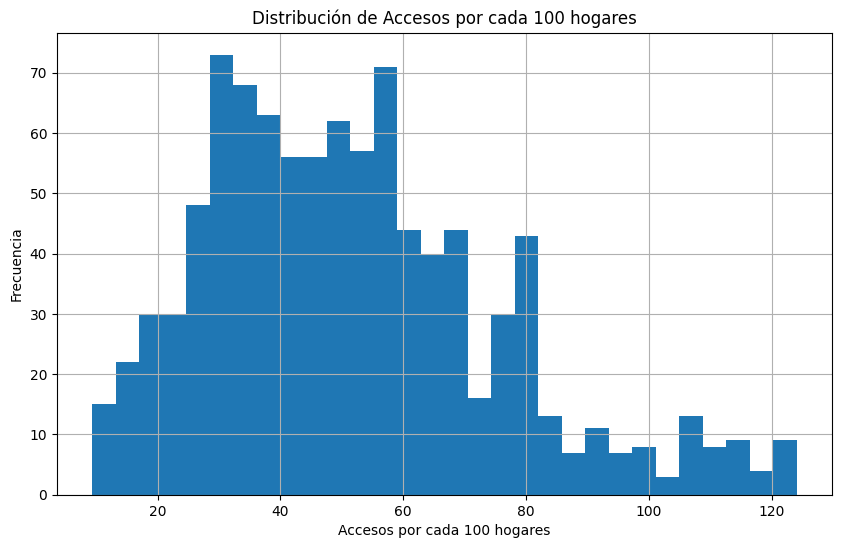

In [194]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
df_penetracion['Accesos por cada 100 hogares'].hist(bins=30)
plt.title('Distribución de Accesos por cada 100 hogares')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Frecuencia')
plt.show()

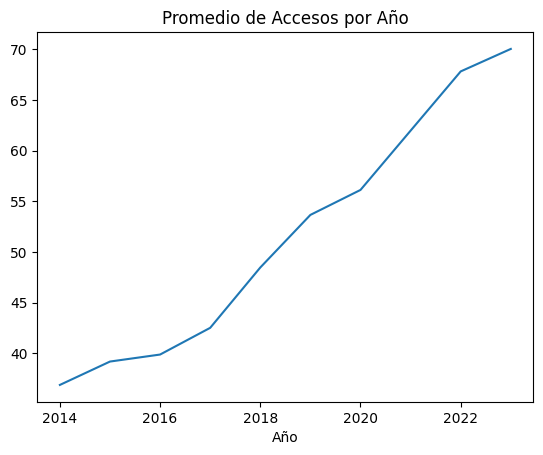

In [195]:
df_penetracion.groupby('Año')['Accesos por cada 100 hogares'].mean().plot(kind='line')
plt.title('Promedio de Accesos por Año')
plt.show()

In [196]:
provincias_promedio = df_penetracion.groupby('Provincia')['Accesos por cada 100 hogares'].mean().sort_values(ascending=False)
print(provincias_promedio)

Provincia
capital federal        114.062131
tierra del fuego        81.594506
la pampa                73.996262
córdoba                 69.280120
buenos aires            65.588404
santa fe                64.447959
neuquén                 64.071751
chubut                  56.242669
río negro               55.119703
entre ríos              52.747270
san luis                49.509912
la rioja                46.318558
tucumán                 45.795914
salta                   43.440411
catamarca               39.833080
mendoza                 38.730215
jujuy                   38.112231
misiones                37.483971
corrientes              37.281579
san juan                35.201661
santa cruz              34.637161
chaco                   34.456302
santiago del estero     34.143117
formosa                 27.802833
Name: Accesos por cada 100 hogares, dtype: float64


In [197]:
def categorizar_acceso(valor):
    if valor < 30: return 'Bajo'
    elif valor < 60: return 'Medio'
    elif valor < 90: return 'Alto'
    else: return 'Muy Alto'

df_penetracion['Categoria_Acceso'] = df_penetracion['Accesos por cada 100 hogares'].apply(categorizar_acceso)

In [198]:
print(df_penetracion['Año'].value_counts().sort_index())
print(df_penetracion['Trimestre'].value_counts().sort_index())

Año
2014    96
2015    96
2016    96
2017    96
2018    96
2019    96
2020    96
2021    96
2022    96
2023    96
Name: count, dtype: int64
Trimestre
1    240
2    240
3    240
4    240
Name: count, dtype: int64


In [199]:
df_penetracion['ID'] = df_penetracion['Provincia'] + '_' + df_penetracion['Año'].astype(str) + '_' + df_penetracion['Trimestre'].astype(str)

In [200]:
df_penetracion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Fecha,Categoria_Acceso,ID
0,2023,4,buenos aires,80.96,2023-10-01,Alto,buenos aires_2023_4
1,2023,4,capital federal,117.02,2023-10-01,Muy Alto,capital federal_2023_4
2,2023,4,catamarca,68.63,2023-10-01,Alto,catamarca_2023_4
3,2023,4,chaco,44.35,2023-10-01,Medio,chaco_2023_4
4,2023,4,chubut,84.96,2023-10-01,Alto,chubut_2023_4


In [201]:
df_penetracion = df_penetracion.sort_values(['Provincia', 'Año', 'Trimestre'])
df_penetracion['Tasa_Cambio'] = df_penetracion.groupby('Provincia')['Accesos por cada 100 hogares'].pct_change()

In [202]:
df_penetracion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 936 to 23
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Año                           960 non-null    int64         
 1   Trimestre                     960 non-null    int64         
 2   Provincia                     960 non-null    object        
 3   Accesos por cada 100 hogares  960 non-null    float64       
 4   Fecha                         960 non-null    datetime64[ns]
 5   Categoria_Acceso              960 non-null    object        
 6   ID                            960 non-null    object        
 7   Tasa_Cambio                   936 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 67.5+ KB


In [203]:
df_tecnologia=pd.read_excel('Data\Internet.xlsx' ,sheet_name='Accesos Por Tecnología')

In [204]:
df_tecnologia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2023,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0
1,2023,4,Capital Federal,58700.0,1198835.0,182520.0,4492.0,29820.0,1474367.0
2,2023,4,Catamarca,6669.0,11016.0,55437.0,1384.0,81.0,74587.0
3,2023,4,Chaco,14000.0,60277.0,62301.0,8404.0,2404.0,147386.0
4,2023,4,Chubut,26306.0,77217.0,26174.0,30543.0,9930.0,170170.0


In [205]:
df_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           961 non-null    object 
 1   Trimestre     961 non-null    object 
 2   Provincia     960 non-null    object 
 3   ADSL          960 non-null    float64
 4   Cablemodem    960 non-null    float64
 5   Fibra óptica  960 non-null    float64
 6   Wireless      960 non-null    float64
 7   Otros         960 non-null    float64
 8   Total         960 non-null    float64
dtypes: float64(6), object(3)
memory usage: 67.8+ KB


In [206]:
print("Porcentaje de valores nulos:\n", df_tecnologia.isna().sum())
print("\nCantidad de filas duplicadas:\n", df_tecnologia.duplicated().sum())

Porcentaje de valores nulos:
 Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64

Cantidad de filas duplicadas:
 0


In [207]:
df_tecnologia = df_tecnologia.map(lambda x: x.lower() if isinstance(x, str) else x)
faltantes = ['', ' ', '.', '...', 'sd', 'sd-sd', 'point (. .)']
df_tecnologia.replace(faltantes, np.nan, inplace=True)
df_tecnologia.infer_objects(copy=False)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2023,4,buenos aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0
1,2023,4,capital federal,58700.0,1198835.0,182520.0,4492.0,29820.0,1474367.0
2,2023,4,catamarca,6669.0,11016.0,55437.0,1384.0,81.0,74587.0
3,2023,4,chaco,14000.0,60277.0,62301.0,8404.0,2404.0,147386.0
4,2023,4,chubut,26306.0,77217.0,26174.0,30543.0,9930.0,170170.0
...,...,...,...,...,...,...,...,...,...
957,2014,1,santiago del estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
958,2014,1,tierra del fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0
959,2014,1,tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0
960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
df_tecnologia.dropna(inplace=True)

In [209]:
df_tecnologia.Año.unique()

array([2023, 2022, 2021, 2020, 2019, '2019 *', 2018, 2017, 2016, 2015,
       2014], dtype=object)

In [210]:
df_tecnologia['Año'] = df_tecnologia['Año'].astype(str).str.replace(r'\D', '', regex=True)

# Convertir a enteros y manejar valores nulos
df_tecnologia['Año'] = pd.to_numeric(df_tecnologia['Año'], errors='coerce')

In [211]:
df_tecnologia['Año'] = df_tecnologia['Año'].astype(int)
df_tecnologia['Trimestre'] = df_tecnologia['Trimestre'].astype(str)

In [212]:
df_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 0 to 959
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           960 non-null    int32  
 1   Trimestre     960 non-null    object 
 2   Provincia     960 non-null    object 
 3   ADSL          960 non-null    float64
 4   Cablemodem    960 non-null    float64
 5   Fibra óptica  960 non-null    float64
 6   Wireless      960 non-null    float64
 7   Otros         960 non-null    float64
 8   Total         960 non-null    float64
dtypes: float64(6), int32(1), object(2)
memory usage: 71.2+ KB


In [213]:
# Calcular porcentaje de cada tecnología
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
for tech in tecnologias:
    df_tecnologia[f'Porcentaje_{tech}'] = df_tecnologia[tech] / df_tecnologia['Total'] * 100

# Eliminar las columnas originales de cantidad y la columna Total
df_tecnologia.drop(columns=tecnologias + ['Total'], inplace=True)

# Verificar cambios
print(df_tecnologia.head())


    Año Trimestre        Provincia  Porcentaje_ADSL  Porcentaje_Cablemodem  \
0  2023         4     buenos aires         4.457461              55.824264   
1  2023         4  capital federal         3.981370              81.311844   
2  2023         4        catamarca         8.941236              14.769330   
3  2023         4            chaco         9.498867              40.897372   
4  2023         4           chubut        15.458659              45.376388   

   Porcentaje_Fibra óptica  Porcentaje_Wireless  Porcentaje_Otros  
0                35.609104             2.753461          1.355709  
1                12.379550             0.304673          2.022563  
2                74.325285             1.855551          0.108598  
3                42.270636             5.702034          1.631091  
4                15.381089            17.948522          5.835341  


In [214]:
df_tecnologia['Total_Porcentaje'] = df_tecnologia[[f'Porcentaje_{tech}' for tech in tecnologias]].sum(axis=1)
if not all(df_tecnologia['Total_Porcentaje'].round(2) == 100):
    print("Advertencia: Los porcentajes no suman 100 en algunas filas.")


In [215]:
df_tecnologia.head()

,Año,Trimestre,Provincia,Porcentaje_ADSL,Porcentaje_Cablemodem,Porcentaje_Fibra óptica,Porcentaje_Wireless,Porcentaje_Otros,Total_Porcentaje
0,2023,4,buenos aires,4.457461,55.824264,35.609104,2.753461,1.355709,100.0
1,2023,4,capital federal,3.981370,81.311844,12.379550,0.304673,2.022563,100.0
2,2023,4,catamarca,8.941236,14.769330,74.325285,1.855551,0.108598,100.0
3,2023,4,chaco,9.498867,40.897372,42.270636,5.702034,1.631091,100.0
4,2023,4,chubut,15.458659,45.376388,15.381089,17.948522,5.835341,100.0


In [216]:
df_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 0 to 959
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      960 non-null    int32  
 1   Trimestre                960 non-null    object 
 2   Provincia                960 non-null    object 
 3   Porcentaje_ADSL          960 non-null    float64
 4   Porcentaje_Cablemodem    960 non-null    float64
 5   Porcentaje_Fibra óptica  960 non-null    float64
 6   Porcentaje_Wireless      960 non-null    float64
 7   Porcentaje_Otros         960 non-null    float64
 8   Total_Porcentaje         960 non-null    float64
dtypes: float64(6), int32(1), object(2)
memory usage: 71.2+ KB


In [217]:
df_acc_velocidad=pd.read_excel('Data\Internet.xlsx', sheet_name='Accesos por velocidad')

In [218]:
df_acc_velocidad.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,4,Buenos Aires,26909.0,23962.0,228393.0,239339.0,246144.0,110876.0,4042646.0,93351.0,5011620.0
1,2024,4,Capital Federal,516.0,4544.0,26409.0,48083.0,33925.0,5829.0,1355061.0,0.0,1474367.0
2,2024,4,Catamarca,71.0,209.0,3065.0,3734.0,4423.0,1827.0,61181.0,77.0,74587.0
3,2024,4,Chaco,236.0,477.0,14811.0,10361.0,6247.0,5729.0,105485.0,4040.0,147386.0
4,2024,4,Chubut,111.0,1088.0,44276.0,31402.0,22843.0,20196.0,33665.0,16589.0,170170.0


In [219]:
df_acc_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  960 non-null    int64  
 1   Trimestre            960 non-null    int64  
 2   Provincia            960 non-null    object 
 3   HASTA 512 kbps       960 non-null    float64
 4   + 512 Kbps - 1 Mbps  960 non-null    float64
 5   + 1 Mbps - 6 Mbps    960 non-null    float64
 6   + 6 Mbps - 10 Mbps   960 non-null    float64
 7   + 10 Mbps - 20 Mbps  960 non-null    float64
 8   + 20 Mbps - 30 Mbps  960 non-null    float64
 9   + 30 Mbps            960 non-null    float64
 10  OTROS                954 non-null    float64
 11  Total                960 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 90.1+ KB


In [220]:
print("Porcentaje de valores nulos:\n", df_acc_velocidad.isna().sum())
print("\nCantidad de filas duplicadas:\n", df_acc_velocidad.duplicated().sum())

Porcentaje de valores nulos:
 Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64

Cantidad de filas duplicadas:
 0


In [221]:
df_acc_velocidad['OTROS'].fillna(0, inplace=True)


In [222]:
# Calcular porcentajes de cada velocidad sobre el total
velocidades = [
    'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps',
    '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps',
    '+ 30 Mbps', 'OTROS'
]

for velocidad in velocidades:
    df_acc_velocidad[f'Porcentaje_{velocidad}'] = df_acc_velocidad[velocidad] / df_acc_velocidad['Total'] * 100


In [223]:
# Eliminar las columnas originales de cantidad y la columna Total
df_acc_velocidad.drop(columns=velocidades + ['Total'], inplace=True)

In [224]:
df_acc_velocidad.head()

,Año,Trimestre,Provincia,Porcentaje_HASTA 512 kbps,Porcentaje_+ 512 Kbps - 1 Mbps,Porcentaje_+ 1 Mbps - 6 Mbps,Porcentaje_+ 6 Mbps - 10 Mbps,Porcentaje_+ 10 Mbps - 20 Mbps,Porcentaje_+ 20 Mbps - 30 Mbps,Porcentaje_+ 30 Mbps,Porcentaje_OTROS
0,2024,4,Buenos Aires,0.536932,0.478129,4.557269,4.775681,4.911466,2.212378,80.665453,1.862691
1,2024,4,Capital Federal,0.034998,0.308200,1.791209,3.261264,2.300987,0.395356,91.907985,0.000000
2,2024,4,Catamarca,0.095191,0.280210,4.109295,5.006234,5.929988,2.449489,82.026358,0.103235
3,2024,4,Chaco,0.160124,0.323640,10.049123,7.029840,4.238530,3.887072,71.570570,2.741102
4,2024,4,Chubut,0.065229,0.639361,26.018687,18.453311,13.423635,11.868132,19.783158,9.748487


In [225]:
df_acc_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Año                             960 non-null    int64  
 1   Trimestre                       960 non-null    int64  
 2   Provincia                       960 non-null    object 
 3   Porcentaje_HASTA 512 kbps       960 non-null    float64
 4   Porcentaje_+ 512 Kbps - 1 Mbps  960 non-null    float64
 5   Porcentaje_+ 1 Mbps - 6 Mbps    960 non-null    float64
 6   Porcentaje_+ 6 Mbps - 10 Mbps   960 non-null    float64
 7   Porcentaje_+ 10 Mbps - 20 Mbps  960 non-null    float64
 8   Porcentaje_+ 20 Mbps - 30 Mbps  960 non-null    float64
 9   Porcentaje_+ 30 Mbps            960 non-null    float64
 10  Porcentaje_OTROS                960 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 82.6+ KB


In [226]:
df_prov=pd.read_excel('Data\Internet.xlsx', sheet_name='Velocidad % por prov')

In [227]:
df_prov.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2023,4,Buenos Aires,158.49
1,2023,4,Capital Federal,234.44
2,2023,4,Catamarca,89.40
3,2023,4,Chaco,107.14
4,2023,4,Chubut,20.29


In [228]:
df_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     960 non-null    int64  
 1   Trimestre               960 non-null    int64  
 2   Provincia               960 non-null    object 
 3   Mbps (Media de bajada)  960 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.1+ KB


In [229]:
print("Porcentaje de valores nulos:\n", df_prov.isna().sum())
print("\nCantidad de filas duplicadas:\n", df_prov.duplicated().sum())

Porcentaje de valores nulos:
 Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

Cantidad de filas duplicadas:
 0


In [230]:
df_ingresos=pd.read_excel('Data\Internet.xlsx', sheet_name='Ingresos')

In [231]:
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2023,4,1.673760e+08,Oct-Dic 2023
1,2023,3,1.331066e+08,Jul-Sept 2023
2,2023,2,1.180603e+08,Jun-Mar 2023
3,2033,1,1.041350e+08,Ene-Mar 2023
4,2022,4,7.244348e+07,Oct-Dic 2022


In [232]:
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        40 non-null     int64  
 1   Trimestre                  40 non-null     int64  
 2   Ingresos (miles de pesos)  40 non-null     float64
 3   Periodo                    40 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [233]:
print("Porcentaje de valores nulos:\n", df_ingresos.isna().sum())
print("\nCantidad de filas duplicadas:\n", df_ingresos.duplicated().sum())

Porcentaje de valores nulos:
 Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

Cantidad de filas duplicadas:
 0


In [234]:
df_pen_poblacion=pd.read_excel('Data\Internet.xlsx', sheet_name='Penetración-poblacion')

In [235]:
df_pen_poblacion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2023,4,Buenos Aires,27.68
1,2023,4,Capital Federal,47.80
2,2023,4,Catamarca,17.46
3,2023,4,Chaco,11.85
4,2023,4,Chubut,26.04


In [236]:
df_pen_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       960 non-null    int64  
 1   Trimestre                 960 non-null    int64  
 2   Provincia                 960 non-null    object 
 3   Accesos por cada 100 hab  960 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.1+ KB


In [237]:
df_tec_localidad=pd.read_excel('Data\Internet.xlsx', sheet_name='Accesos_tecnologia_localidad')

In [238]:
df_tec_localidad.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,756,4600,0,3,0,742,0,726,6827
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,496,16,0,0,185,1479
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


In [239]:
df_tec_localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3076 non-null   object
 1   Partido        3076 non-null   object
 2   Localidad      3076 non-null   object
 3   Link Indec     3076 non-null   object
 4   ADSL           3076 non-null   int64 
 5   CABLEMODEM     3076 non-null   int64 
 6   DIAL UP        3076 non-null   int64 
 7   FIBRA OPTICA   3076 non-null   int64 
 8   OTROS          3076 non-null   int64 
 9   SATELITAL      3076 non-null   int64 
 10  WIMAX          3076 non-null   int64 
 11  WIRELESS       3076 non-null   int64 
 12  Total general  3076 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 312.5+ KB


In [240]:
print("Porcentaje de valores nulos:\n", df_tec_localidad.isna().sum())
print("\nCantidad de filas duplicadas:\n", df_tec_localidad.duplicated().sum())

Porcentaje de valores nulos:
 Provincia        0
Partido          0
Localidad        0
Link Indec       0
ADSL             0
CABLEMODEM       0
DIAL UP          0
FIBRA OPTICA     0
OTROS            0
SATELITAL        0
WIMAX            0
WIRELESS         0
Total general    0
dtype: int64

Cantidad de filas duplicadas:
 0


In [241]:
# Función para limpiar y convertir valores a enteros
def limpiar_trimestre(valor):
    try:
        return int(valor)
    except ValueError:
        return None  # O puedes elegir un valor por defecto, como 0

# Aplicar la función de limpieza
df_tecnologia['Trimestre'] = df_tecnologia['Trimestre'].apply(limpiar_trimestre)

# Verificar si todavía existen valores no numéricos
print(df_tecnologia['Trimestre'].isnull().sum())

# Opcional: Eliminar filas con valores no numéricos en Trimestre
df_tecnologia = df_tecnologia.dropna(subset=['Trimestre'])

# Convertir la columna Trimestre a tipo int
df_tecnologia['Trimestre'] = df_tecnologia['Trimestre'].astype(int)

72


In [242]:
# Verificar tipos de datos
print(df_penetracion.dtypes)
print(df_tecnologia.dtypes)
print(df_acc_velocidad.dtypes)
print(df_prov.dtypes)
print(df_ingresos.dtypes)
print(df_pen_poblacion.dtypes)
print(df_tec_localidad.dtypes)

Año                                      int64
Trimestre                                int64
Provincia                               object
Accesos por cada 100 hogares           float64
Fecha                           datetime64[ns]
Categoria_Acceso                        object
ID                                      object
Tasa_Cambio                            float64
dtype: object
Año                          int32
Trimestre                    int32
Provincia                   object
Porcentaje_ADSL            float64
Porcentaje_Cablemodem      float64
Porcentaje_Fibra óptica    float64
Porcentaje_Wireless        float64
Porcentaje_Otros           float64
Total_Porcentaje           float64
dtype: object
Año                                 int64
Trimestre                           int64
Provincia                          object
Porcentaje_HASTA 512 kbps         float64
Porcentaje_+ 512 Kbps - 1 Mbps    float64
Porcentaje_+ 1 Mbps - 6 Mbps      float64
Porcentaje_+ 6 Mbps - 10 Mbps

In [243]:
# Combinar df_penetracion y df_tecnologia
df_comb1 = pd.merge(df_penetracion, df_tecnologia, on=['Año', 'Trimestre', 'Provincia'], how='left')

# Combinar el resultado anterior con df_acc_velocidad
df_comb2 = pd.merge(df_comb1, df_acc_velocidad, on=['Año', 'Trimestre', 'Provincia'], how='left')

# Combinar el resultado anterior con df_prov
df_comb3 = pd.merge(df_comb2, df_prov, on=['Año', 'Trimestre', 'Provincia'], how='left')

# Combinar el resultado anterior con df_pen_poblacion
df_comb4 = pd.merge(df_comb3, df_pen_poblacion, on=['Año', 'Trimestre', 'Provincia'], how='left')

# df_ingresos tiene menos registros, así que usaremos una unión left
df_internet = pd.merge(df_comb4, df_ingresos, on=['Año', 'Trimestre'], how='left')

# Verificar la estructura del DataFrame combinado
print(df_internet.info())

# Manejar valores faltantes
df_internet.fillna(0, inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Año                             960 non-null    int64         
 1   Trimestre                       960 non-null    int64         
 2   Provincia                       960 non-null    object        
 3   Accesos por cada 100 hogares    960 non-null    float64       
 4   Fecha                           960 non-null    datetime64[ns]
 5   Categoria_Acceso                960 non-null    object        
 6   ID                              960 non-null    object        
 7   Tasa_Cambio                     936 non-null    float64       
 8   Porcentaje_ADSL                 888 non-null    float64       
 9   Porcentaje_Cablemodem           888 non-null    float64       
 10  Porcentaje_Fibra óptica         888 non-null    float64       
 11  Porcen

In [256]:
df_internet.head()

,ID,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Fecha,Categoria_Acceso,Tasa_Cambio,Porcentaje_ADSL,Porcentaje_Cablemodem,...,Porcentaje_+ 1 Mbps - 6 Mbps,Porcentaje_+ 6 Mbps - 10 Mbps,Porcentaje_+ 10 Mbps - 20 Mbps,Porcentaje_+ 20 Mbps - 30 Mbps,Porcentaje_+ 30 Mbps,Porcentaje_OTROS,Mbps (Media de bajada),Accesos por cada 100 hab,Ingresos (miles de pesos),Periodo
0,buenos aires_2014_1,2014,1,buenos aires,54.570073,2014-01-01,Medio,0.000000,57.217370,36.530084,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.984054e+06,Ene-Mar 2014
1,buenos aires_2014_2,2014,2,buenos aires,55.061417,2014-04-01,Medio,0.009004,56.750041,37.094337,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.270816e+06,Abr-Jun 2014
2,buenos aires_2014_3,2014,3,buenos aires,56.754739,2014-07-01,Medio,0.030753,54.834089,38.975352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.478638e+06,Jul-Sept 2014
3,buenos aires_2014_4,2014,4,buenos aires,56.094337,2014-10-01,Medio,-0.011636,55.957040,37.996461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.950441e+06,Oct-Dic 2014
4,buenos aires_2015_1,2015,1,buenos aires,56.370484,2015-01-01,Medio,0.004923,55.318742,38.326225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.876385e+06,Ene-Mar 2015


In [245]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Año                             960 non-null    int64         
 1   Trimestre                       960 non-null    int64         
 2   Provincia                       960 non-null    object        
 3   Accesos por cada 100 hogares    960 non-null    float64       
 4   Fecha                           960 non-null    datetime64[ns]
 5   Categoria_Acceso                960 non-null    object        
 6   ID                              960 non-null    object        
 7   Tasa_Cambio                     960 non-null    float64       
 8   Porcentaje_ADSL                 960 non-null    float64       
 9   Porcentaje_Cablemodem           960 non-null    float64       
 10  Porcentaje_Fibra óptica         960 non-null    float64       
 11  Porcen

In [255]:
# Obtén una lista con el nombre de las columnas, moviendo 'id' al inicio
cols = ['ID'] + [col for col in df_internet.columns if col != 'ID']

# Reordena el DataFrame con las columnas en el nuevo orden
df_internet = df_internet[cols]

In [253]:
df_internet[['ID']].duplicated().sum()

0

In [257]:
df_internet.to_csv('CleanData\Internet1.csv')

In [293]:
df_mapa=pd.read_excel('Data\mapa_conectividad.xlsx')

In [294]:
df_mapa.head()

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,Sí,--,--,--,--,--,Sí,Sí,Sí,6588010.0,-35.292982,-61.407254
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,--,--,--,--,--,--,Sí,Sí,Sí,6588020.0,-35.239499,-60.825136
2,BUENOS AIRES,9 de Julio,Dudignac,2670,--,--,Sí,--,--,Sí,Sí,Sí,Sí,6588040.0,-35.651193,-60.709896
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),531,--,--,--,--,--,--,--,--,Sí,6588050.0,-35.407947,-61.210567
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),748,Sí,--,--,Sí,--,--,Sí,Sí,Sí,6588060.0,-35.520141,-60.998949


In [295]:
df_mapa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provincia       4311 non-null   object 
 1   Partido         4311 non-null   object 
 2   Localidad       4311 non-null   object 
 3   Población       4311 non-null   int64  
 4   ADSL            4311 non-null   object 
 5   Cablemódem      4311 non-null   object 
 6   Dial Up         4311 non-null   object 
 7   Fibra óptica    4311 non-null   object 
 8   Satelital       4311 non-null   object 
 9   Wireless        4311 non-null   object 
 10  Telefonía Fija  4311 non-null   object 
 11  3G              4311 non-null   object 
 12  4G              4311 non-null   object 
 13  Link            4299 non-null   float64
 14  Latitud         4311 non-null   float64
 15  Longitud        4311 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory usage: 539.0+ KB


In [296]:
print("Porcentaje de valores nulos:\n", df_mapa.isna().sum())
print("\nCantidad de filas duplicadas:\n", df_mapa.duplicated().sum())

Porcentaje de valores nulos:
 Provincia          0
Partido            0
Localidad          0
Población          0
ADSL               0
Cablemódem         0
Dial Up            0
Fibra óptica       0
Satelital          0
Wireless           0
Telefonía Fija     0
3G                 0
4G                 0
Link              12
Latitud            0
Longitud           0
dtype: int64

Cantidad de filas duplicadas:
 0


In [297]:
df_mapa.dropna(inplace=True)

In [298]:
cols_booleanas = ['ADSL', 'Cablemódem', 'Dial Up', 'Fibra óptica', 'Satelital', 'Wireless', 'Telefonía Fija', '3G', '4G']
for col in cols_booleanas:
    df_mapa[col] = df_mapa[col].map({'Sí': True, '--': False})

In [307]:
df_mapa.head()

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud,Total_Servicios_Disponibles,Categoria_Poblacion,Coordenadas_Validas,Poblacion_Razonable
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,True,False,False,False,False,False,True,True,True,6588010.0,-35.292982,-61.407254,4,Pequeña,True,True
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,False,False,False,False,False,False,True,True,True,6588020.0,-35.239499,-60.825136,3,Muy pequeña,True,True
2,BUENOS AIRES,9 de Julio,Dudignac,2670,False,False,True,False,False,True,True,True,True,6588040.0,-35.651193,-60.709896,5,Mediana,True,True
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),531,False,False,False,False,False,False,False,False,True,6588050.0,-35.407947,-61.210567,1,Pequeña,True,True
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),748,True,False,False,True,False,False,True,True,True,6588060.0,-35.520141,-60.998949,5,Pequeña,True,True


In [300]:
cols_servicios = ['ADSL', 'Cablemódem', 'Dial Up', 'Fibra óptica', 'Satelital', 'Wireless', 'Telefonía Fija', '3G', '4G']
df_mapa['Total_Servicios_Disponibles'] = df_mapa[cols_servicios].apply(lambda x: x.map({True: 1, False: 0}).sum(), axis=1)

In [301]:
def categorizar_poblacion(poblacion):
    if poblacion < 500:
        return 'Muy pequeña'
    elif 500 <= poblacion < 2000:
        return 'Pequeña'
    elif 2000 <= poblacion < 10000:
        return 'Mediana'
    else:
        return 'Grande'

df_mapa['Categoria_Poblacion'] = df_mapa['Población'].apply(categorizar_poblacion)

In [309]:
lat_min, lat_max = -41.0, -33.0
lon_min, lon_max = -63.0, -56.0

df_mapa['Coordenadas_Validas'] = (
    (df_mapa['Latitud'] >= lat_min) & (df_mapa['Latitud'] <= lat_max) &
    (df_mapa['Longitud'] >= lon_min) & (df_mapa['Longitud'] <= lon_max)
)

# 5. Comprobar que los valores de población sean razonables
poblacion_max_razonable = 5000000  # Ajusta este valor según lo que consideres razonable
df_mapa['Poblacion_Razonable'] = df_mapa['Población'] <= poblacion_max_razonable

# Imprimir un resumen de los resultados
print(f"Registros con coordenadas inválidas: {(~df_mapa['Coordenadas_Validas']).sum()}")
print(f"Registros con población no razonable: {(~df_mapa['Poblacion_Razonable']).sum()}")
df_mapa[['Localidad', 'Población', 'Total_Servicios_Disponibles', 'Categoria_Poblacion']].head()

Registros con coordenadas inválidas: 0
Registros con población no razonable: 0


,Localidad,Población,Total_Servicios_Disponibles,Categoria_Poblacion
0,Alfredo Demarchi (Est. Facundo Quiroga),1853,4,Pequeña
1,Carlos María Naón,497,3,Muy pequeña
2,Dudignac,2670,5,Mediana
3,La Aurora (Est. La Niña),531,1,Pequeña
4,Manuel B. Gonnet (Est. French),748,5,Pequeña


In [308]:
# Mostrar el número de filas antes de la eliminación
print(f"Número de filas antes de la eliminación: {len(df_mapa)}")

# Eliminar las filas donde Coordenadas_Validas es False
df_mapa = df_mapa[df_mapa['Coordenadas_Validas'] == True]

# Mostrar el número de filas después de la eliminación
print(f"Número de filas después de la eliminación: {len(df_mapa)}")

# Resetear el índice del DataFrame
df_mapa = df_mapa.reset_index(drop=True)


print("Registros con coordenadas inválidas han sido eliminados.")


Número de filas antes de la eliminación: 4299
Número de filas después de la eliminación: 1053
Registros con coordenadas inválidas han sido eliminados.


In [312]:
df_mapa.head()

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud,Total_Servicios_Disponibles,Categoria_Poblacion
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,True,False,False,False,False,False,True,True,True,6588010.0,-35.292982,-61.407254,4,Pequeña
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,False,False,False,False,False,False,True,True,True,6588020.0,-35.239499,-60.825136,3,Muy pequeña
2,BUENOS AIRES,9 de Julio,Dudignac,2670,False,False,True,False,False,True,True,True,True,6588040.0,-35.651193,-60.709896,5,Mediana
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),531,False,False,False,False,False,False,False,False,True,6588050.0,-35.407947,-61.210567,1,Pequeña
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),748,True,False,False,True,False,False,True,True,True,6588060.0,-35.520141,-60.998949,5,Pequeña


In [311]:
df_mapa.drop(columns=['Coordenadas_Validas', 'Poblacion_Razonable'], inplace=True)

In [313]:
df_mapa.to_csv('CleanData\Mapa.csv')

In [ ]:
df_movil=pd.read_excel('Data\Telefonia_movil.xlsx', )